In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import describe

In [4]:
state = 'GA'

file_symptoms_test = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_test.fea'
noun_sentence_state_test = pd.read_feather(file_symptoms_test)


In [6]:
file_symptoms_train = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_train.fea'

noun_sentence_state_train = pd.read_feather(file_symptoms_train)


In [7]:
noun_sentence_state = noun_sentence_state_train.copy(deep=True)

In [8]:
noun_sentence_state = noun_sentence_state.append(noun_sentence_state_test)

In [9]:
from scipy.interpolate import interp1d
def q2q(dataset1,dataset2):
    percentiles1 = np.percentile(dataset1,np.arange(1,98,1))
    percentiles2 = np.percentile(dataset2,np.arange(1,98,1))
    f_interpol = interp1d(percentiles1, percentiles2,fill_value="extrapolate")
    dataset1_mod = f_interpol(dataset1)
    return f_interpol, dataset1_mod

,seller chooses attorney,omission and or,actual plan,tack room,utilities inspections,needs repairs,seller requests buyer use seller,new shaker cabinets,hud home,new white kitchen,...,"new stainless steel appliances, story foyer","new stainless steel appliances, tile floor","new stainless steel appliances, walkin closet","new stainless steel appliances, water heater","new stainless steel appliances, white cabinets","separate garden tub, separate shower","separate garden tub, walkin closet","separate shower, walkin closet","main level, new granite counter tops, new stainless steel appliances","new granite counter tops, new hardwood floors, new stainless steel appliances"
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83839,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83840,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83841,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83842,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
noun_sentence_state['transaction_year'] = np.floor(np.array((noun_sentence_state['Transdate'].values/10000)))

In [20]:
noun_sentence_state['avmValue_corrected'] = -9999. 

In [44]:
for idd,quarters in enumerate(noun_sentence_state['transaction_year'].unique()):
    print(quarters,idd,len(noun_sentence_state['transaction_year'].unique()))
    d_temp = noun_sentence_state[noun_sentence_state['transaction_year']==quarters]
    print('trans price')
    trans_price = d_temp.Transprice.values
    print('avm value')
    avmvalue_price = d_temp.avmValue.values 
    f_interpol, avmvalue_price_corrected  = q2q(avmvalue_price,trans_price)
    noun_sentence_state.loc[noun_sentence_state['transaction_year']==quarters,['avmValue_corrected']] = avmvalue_price_corrected
    

2018.0 0 1172
trans price
avm value
2020.0 1 1172
trans price
avm value
2019.0 2 1172
trans price
avm value
2021.0 3 1172
trans price
avm value


In [75]:
noun_sentence_state['sum'] = noun_sentence_state.iloc[:,51:-1].sum(axis=1)

In [45]:
noun_sentence_state.loc[:,['avmValue_corrected'] ] 

,avmValue_corrected
0,169457.458682
1,265620.628533
2,396416.198398
3,162572.808572
4,177506.549392
...,...
83839,154201.357066
83840,274609.802398
83841,559979.981349
83842,311365.238392


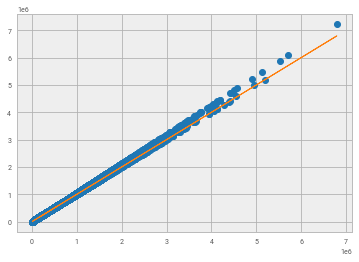

In [46]:
plt.plot(noun_sentence_state['avmValue'],noun_sentence_state['avmValue_corrected'],'o')
plt.plot(noun_sentence_state['avmValue'],noun_sentence_state['avmValue'])

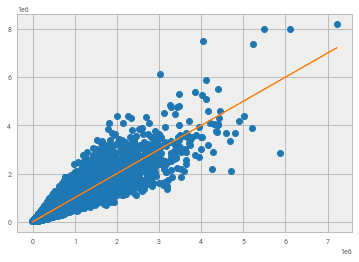

In [47]:
plt.plot(noun_sentence_state['avmValue_corrected'],noun_sentence_state['Transprice'],'o')
plt.plot(noun_sentence_state['avmValue_corrected'],noun_sentence_state['avmValue_corrected'])

In [60]:
sub_noun_sentence_state = noun_sentence_state.iloc[:,51:-1]

In [61]:
sub_noun_sentence_state_total = sub_noun_sentence_state.sum()

In [72]:
sub_noun_sentence_state_total_filtered = sub_noun_sentence_state_total[sub_noun_sentence_state_total.values>300]

In [91]:
sub_noun_sentence_state_total_filtered = sub_noun_sentence_state_total_filtered.to_frame()

In [105]:
sub_noun_sentence_state_total_filtered['Cost_difference_2020'] = np.nan

In [106]:
sub_noun_sentence_state_total_filtered['Cost_difference_2020_by_area'] = np.nan

In [97]:
sub_noun_sentence_state_total_filtered = sub_noun_sentence_state_total_filtered.rename(columns = {0 : 'Appearances'})

In [107]:
sub_noun_sentence_state_total_filtered

,Appearances,Cost_difference_2020,Cost_difference_2020_by_area,frequency
new shaker cabinets,314.0,NaN,NaN,0.374505
absolute model home,365.0,NaN,NaN,0.435332
needs tender loving care,584.0,NaN,NaN,0.696532
tender loving care home,420.0,NaN,NaN,0.500930
new bathrooms,905.0,NaN,NaN,1.079386
...,...,...,...,...
"separate garden tub, separate shower",4862.0,NaN,NaN,5.798865
"separate garden tub, walkin closet",1466.0,NaN,NaN,1.748485
"separate shower, walkin closet",2181.0,NaN,NaN,2.601259
"main level, new granite counter tops, new stainless steel appliances",1421.0,NaN,NaN,1.694814


In [108]:
for key_phrase in sub_noun_sentence_state_total_filtered.index:
    print(key_phrase)
    
    temp_df = noun_sentence_state[(noun_sentence_state[key_phrase]==1.) & \
                                        (noun_sentence_state['sum']<4) & \
                                       (noun_sentence_state['transaction_year']==2020)]
    
    print(len(temp_df))
    
    
    if len(temp_df)>10:
        result_no_area = (noun_sentence_state.loc[temp_df.index,'Transprice'] - \
                          noun_sentence_state.loc[temp_df.index,'avmValue_corrected'] )

        print('Mean', np.mean(result_no_area))
        print('Median', np.median(result_no_area))
        
        sub_noun_sentence_state_total_filtered.loc[key_phrase,'Cost_difference_2020'] = np.mean(result_no_area) 
    
        #print(np.percentile(result_no_area,[25,50,75]))
        result_by_area = (noun_sentence_state.loc[temp_df.index,'Transprice'] - \
                          noun_sentence_state.loc[temp_df.index,'avmValue_corrected'] )/\
                            noun_sentence_state.loc[temp_df.index,'cj_living_area'].values
        
        print('Mean',np.mean(result_by_area))
        print('Median', np.median(result_by_area))
        #print(np.percentile(result_by_area,[25,50,75]))
        
        sub_noun_sentence_state_total_filtered.loc[key_phrase,'Cost_difference_2020_by_area'] = np.mean(result_by_area)
    
    print('')

new shaker cabinets
3

absolute model home 
1

needs tender loving care
54
Mean -22621.674455465392
Median -22817.035424630565
Mean -14.208700216418686
Median -12.980464042567252

tender loving care home
26
Mean -21158.005952591124
Median -19211.7874004247
Mean -11.836996020418823
Median -7.38079030188508

new bathrooms
15
Mean 10535.546657653273
Median 7808.193704337231
Mean 8.42204422003513
Median 5.046188352834398

great opportunity investors
57
Mean -23087.033214048446
Median -20471.155421595424
Mean -16.407271869669227
Median -13.62262019383003

custom barn doors
1

private park
2

new vanities
6

barn door
5

top bottom
11
Mean -325.1342922029944
Median -2210.9469835108466
Mean 8.820714462651019
Median -1.0793681362456289

great bones
32
Mean -19530.09891321374
Median -13966.532156565925
Mean -10.143018877825423
Median -6.614383406046406

great potential
43
Mean -23692.96891104401
Median -19377.270929884806
Mean -14.949603956776489
Median -12.832874016957474

quartz counters
19
M

Mean 3.709001166248715
Median -1.869961448846147

original wood
24
Mean -8359.381575366839
Median -23442.076805629564
Mean -4.341035759732774
Median -10.427161854107979

gutter guards
5

incredible value
5

captivating home
6

large shower
4

home vacant
201
Mean -9041.15331451627
Median -13008.452106621029
Mean -4.4212484340200655
Median -6.259826026553309

gorgeous outdoor
16
Mean 44354.24786225266
Median 7359.299415095244
Mean 37.522463684832374
Median 4.599562134434527

perkerson park
12
Mean -26936.22550624814
Median -21491.77641722295
Mean -16.235128677627493
Median -12.431867359663116

peachtree city
3

hot water tank
5

two car garage
428
Mean -13090.173671706349
Median -13017.683392440726
Mean -5.926071608647589
Median -6.319058451827778

new granite counter tops
141
Mean -1054.7636897149125
Median -4347.726162024279
Mean 0.2760458433873425
Median -2.2296364787276772

wine cellar
7

private lake
9

black stainless steel appliances
6

amazing pool
8

counter tops
9

fruit trees

Mean -6.3263191233225005
Median -7.033248471162484

great amenities
10

brick paver patio
3

home owners association
9

tennis courts
33
Mean 2106.7791551010578
Median -4790.422381327793
Mean 4.6995388175845525
Median -2.4851164405065225

formal living room
51
Mean 15811.57650206824
Median 1679.6737845240132
Mean 5.992884646971332
Median 1.0384836791217618

front door
17
Mean 30027.978403860187
Median 11880.031641399255
Mean 9.463158626353575
Median 4.601774954315151

separate living room
24
Mean -4536.333334454771
Median -2742.726969671785
Mean -2.791879045600986
Median -1.2288203269138822

separate living
18
Mean 2360.923311092916
Median -1934.7748755192442
Mean 0.4477227941563039
Median -0.9251595118191422

huge kitchen
5

fantastic location
229
Mean -12811.602889095198
Median -9049.18521027459
Mean -5.855107943905633
Median -4.831444800507996

main house
22
Mean 3199.129768483844
Median -12393.678846485418
Mean 2.504328095775076
Median -7.868113838375905

beautiful lot
30
Mean -623

Mean -1.747057376159299
Median -2.576928327957834

oak hardwoods
6

original hardwood floors
64
Mean -3719.9127861015786
Median -3275.0119140180177
Mean -0.4243645316495025
Median -2.232130344288296

master bathroom
30
Mean -4338.953934087356
Median -7031.2344749732
Mean -0.8479438110568375
Median -4.205153888068637

partial basement
9

feet ceilings
11
Mean 31129.58544582619
Median -3113.1640028255642
Mean 0.17678165928121564
Median -0.8654890194121668

ensuite bath
2

basement w
2

ceramic tile kitchen bathrooms
3

master bdrm w
1

butlers pantry
5

separate garden tub
14
Mean -12917.729941483189
Median -14107.425768597968
Mean -5.399543505086028
Median -7.386057068079622

black appliances
9

convenient location
71
Mean -6526.510756201688
Median -3553.1297059633944
Mean -3.550930703658149
Median -1.7894601920551167

plantation shutters
19
Mean 32625.823255798074
Median 5565.4022442944115
Mean 8.774355522161954
Median 2.22316052289497

room combo
9

elementary school
35
Mean -20221.26

Mean 0.757209835013445
Median -0.5710861472350348

formal dinning room
4

master bedroom closets
5

quiet culdesac
41
Mean 14662.990079523928
Median -3010.6145611606626
Mean 2.4990436524705326
Median -1.325733956760193

master retreat
9

loft area
7

cozy fireplace
24
Mean 14291.247858837283
Median -6213.555840821617
Mean 4.820287355357223
Median -2.3368017453259182

open family room
18
Mean -13738.957598271561
Median -8485.110139134136
Mean -4.767403215518108
Median -4.89552105913016

jill bath
1

new wood cabinets
1

low homeowner association
3

furnace water heater
5

friendly neighborhood
15
Mean 7405.023915586327
Median -2872.068487752782
Mean 2.306830156576434
Median -1.5493378853659574

plenty space
36
Mean -12807.375619932869
Median -6719.537071716797
Mean -4.04536447079881
Median -3.5597388614900054

old hvac
9

open concept floor plan
175
Mean 218.15679076209076
Median -4075.0950795543176
Mean 1.0063661303572446
Median -2.0412024608924564

cozy home
15
Mean 315.23381791763865

Mean 1.7101394659136047
Median 0.5217302835957338

spacious family room w
2

water closet
0

kitchen overlooks family room
14
Mean -13171.507006663162
Median -10454.860198281647
Mean -1.831824651247949
Median -5.492326242017787

great office
1

central vac system
0

huge deck
89
Mean -4485.516274740451
Median -2890.499537986645
Mean -1.8148979947542137
Median -2.0335496660442023

storage galore
3

trey ceilings
13
Mean -8606.612864052153
Median -2116.0679918542737
Mean 0.5370188544529905
Median -0.9392223665576004

powder room
4

decatur square
6

upstairs loft
1

breakfast room
52
Mean -15017.128653122529
Median -4040.890641219681
Mean -2.522497660367391
Median -1.97936537599338

washer dryer
27
Mean 5309.1586301332745
Median -11083.311181832687
Mean 9.287424492728423
Median -3.9250705143303852

upstairs bathroom
4

bath home
417
Mean -7504.266146095737
Median -6720.122553104302
Mean -4.190215597746292
Median -3.9970360429015677

low maintenance vinyl
7

upstairs boasts master suite
3

Mean 2.152888420033268
Median -2.005469350511971

double sinks
4

interior paint
25
Mean 6901.382267534557
Median 7020.949320839893
Mean 2.995645025012111
Median 3.6396834218973004

jacuzzi tub
8

room kitchen
26
Mean 862.6404589470632
Median -2368.6002051922624
Mean -0.7641661346978582
Median -1.4293751964869066

center island
3

grocery store
13
Mean -8280.971950029383
Median -7341.100197077583
Mean -0.6465480872889053
Median -5.266212479969572

lots windows
3

patio area
23
Mean 15728.485680954216
Median -3784.144074560958
Mean 5.409147798954305
Median -1.8140671498374679

sunny breakfast room
0

suite bedrooms
5

main floor master suite
5

bedroom walk closet
4

area fireplace
6

large great room wood
9

roof hvac
29
Mean -3678.809396919906
Median -3869.771121336613
Mean -1.136349799127484
Median -1.3521212862811365

breakfast areas
0

tons privacy
4

great cabinet space
1

rear yard
5

new family
8

breakfast nook
7

easy access
92
Mean -9376.5562205179
Median -8025.346686478202
M

Mean -10510.193343613546
Median -5245.639050660684
Mean -1.5166050814261032
Median -2.7502238601206015

septic tanks
13
Mean -19902.701686431446
Median -16874.639184765154
Mean -14.330816095453972
Median -10.26298259227918

generous size
1

easy access i75
11
Mean -6761.307931647482
Median -17622.02826007019
Mean -0.48454860735359184
Median -9.75520611399482

large pantry
1

perfect family gatherings
4

direct access
3

new microwave
1

entry foyer
8

recreation room basement
3

fireplace gas logs
7

original owners
17
Mean 20036.54675989797
Median -452.6494429107843
Mean 1.9296608414495133
Median -0.22887285071166308

brick ranch home
169
Mean -4220.00901860904
Median -4160.1838018526905
Mean -2.1899359393775035
Median -2.6501808932441207

built in book shelves
4

open great room
5

ready condition
8

upstairs room
3

distance shops restaurants
10

large recreation
1

home sits
49
Mean 68.24344075085824
Median -2105.167559397203
Mean 2.2402688377278444
Median -1.10938928457383

additi

0

new granite counter tops, new hardwood floors, new stainless steel appliances
0



In [109]:
sub_noun_sentence_state_total_filtered['frequency'] = sub_noun_sentence_state_total_filtered['Appearances'] / len(noun_sentence_state_test) * 100.

In [110]:
sub_noun_sentence_state_total_filtered

,Appearances,Cost_difference_2020,Cost_difference_2020_by_area,frequency
new shaker cabinets,314.0,NaN,NaN,0.374505
absolute model home,365.0,NaN,NaN,0.435332
needs tender loving care,584.0,-22621.674455,-14.208700,0.696532
tender loving care home,420.0,-21158.005953,-11.836996,0.500930
new bathrooms,905.0,10535.546658,8.422044,1.079386
...,...,...,...,...
"separate garden tub, separate shower",4862.0,NaN,NaN,5.798865
"separate garden tub, walkin closet",1466.0,NaN,NaN,1.748485
"separate shower, walkin closet",2181.0,NaN,NaN,2.601259
"main level, new granite counter tops, new stainless steel appliances",1421.0,NaN,NaN,1.694814


In [113]:
state = 'GA'

file_symptoms_test = 'comments/raw_comments/noun_phrases_'+state+\
                        '_frequency.fea'
sub_noun_sentence_state_total_filtered.reset_index().to_feather(file_symptoms_test)


file_symptoms_test = 'comments/raw_comments/noun_phrases_'+state+\
                        '_frequency.csv'
sub_noun_sentence_state_total_filtered.to_csv(file_symptoms_test)